In [1]:
# libraries for data manipulation
import pandas as pd
import numpy as np
# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
# reduction of the data dimensionality
from sklearn.decomposition import PCA
# variables scalation 
from sklearn.preprocessing import StandardScaler
# clustering libraries
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [2]:
File_to_work_with = '../Data/Proposed_structures_with_AI_caffeine_tanimoto_similarity_.xlsx'

In [3]:
initial = pd.read_excel(File_to_work_with)

In [4]:
initial.head()

,num,new_SMILES,CID,PUBCHEM_SMILES,S=C1N(CC2=CNC3=CC=CC=C32)C(C=CC=C4)=C4S1,OCC1=CN(C(C)=O)C2=CC=CC=C21,CCCOCC1=CNC2=CC=CC=C21,S=C1N(CC2=CNC3=CC=CC=C32)C(C=CC=C4)=C4O1,O=C(C(C=CC=C1)=C1C2=O)N2CCCCCCCCN3N=NC(COCC4=CNC5=C4C=CC=C5)=C3,O=C(C)N(C1=C2C=CC=C1)C=C2CN3N=NC(CN4C=C(COCC)C5=C4C=CC=C5)=C3,...,C12=CC=CC=C1C(CN3C(C=CC=C4)=C4N=C3)=CN2,C12=CC=CC=C1NC=C2COCC3=CN(CCCN4N=NC(COCC5=CNC6=C5C=CC=C6)=C4)N=N3,C12=CC=CC=C1NC=C2COCC3=CN(CCCCCCCCN4N=NC(COCC5=CNC6=C5C=CC=C6)=C4)N=N3,CC(C)CCOCC1=CNC2=CC=CC=C21,O=C(C)N(C1=C2C=CC=C1)C=C2CN3N=NC(COCC4=CNC5=C4C=CC=C5)=C3,O=C(C=C1C)N(CC2=CNC3=C2C=CC=C3)C(N1CC4=CNC5=CC=CC=C54)=O,CC(C)C1=NC=CN1CC2=CNC3=CC=CC=C32,S=C(N1CCCC1)SCC2=CNC3=CC=CC=C32,O=C(C)OCC1=CN(C(C)=O)C2=CC=CC=C21,O=C(C(C)=C1)N(CC2=CNC3=C2C=CC=C3)C(N1CC4=CNC5=CC=CC=C54)=O
0,800,CCOCc1cn(C(C)=O)c2ccccc12,0,0,0.377460,0.905405,0.580265,0.371908,0.423519,0.608534,...,0.392781,0.499429,0.484270,0.575145,0.609284,0.360415,0.365828,0.364679,0.954155,0.368087
1,194,CC(=O)n1cc(COc2ccccc2)c2ccccc21,0,0,0.383609,0.845722,0.447028,0.378122,0.392437,0.541991,...,0.385321,0.427521,0.420561,0.442893,0.558288,0.359899,0.358149,0.360836,0.761548,0.367311
2,130,C=C(C)n1cc(CO)c2ccccc21,0,0,0.364305,0.756522,0.507418,0.373737,0.390331,0.497321,...,0.402235,0.461001,0.442922,0.501453,0.500467,0.361759,0.379845,0.385086,0.677792,0.364662
3,319,CC(=O)n1cc(CCO)c2ccccc21,12375983,CC(=O)N1C=C(C2=CC=CC=C21)CCO,0.388738,0.732782,0.399209,0.360989,0.374893,0.502180,...,0.389957,0.395923,0.386243,0.397668,0.529140,0.345095,0.361433,0.370930,0.672435,0.359347
4,454,c1ccc2c(c1)c1cn2CCCCOC1,0,0,0.366667,0.728155,0.632970,0.380866,0.436199,0.530411,...,0.392009,0.514689,0.514586,0.641538,0.532213,0.355769,0.368984,0.379433,0.776159,0.364555


In [5]:
initial = initial.columns.values.tolist()

In [6]:
initial

['num',
 'new_SMILES',
 'CID',
 'PUBCHEM_SMILES',
 'S=C1N(CC2=CNC3=CC=CC=C32)C(C=CC=C4)=C4S1',
 'OCC1=CN(C(C)=O)C2=CC=CC=C21',
 'CCCOCC1=CNC2=CC=CC=C21',
 'S=C1N(CC2=CNC3=CC=CC=C32)C(C=CC=C4)=C4O1',
 'O=C(C(C=CC=C1)=C1C2=O)N2CCCCCCCCN3N=NC(COCC4=CNC5=C4C=CC=C5)=C3',
 'O=C(C)N(C1=C2C=CC=C1)C=C2CN3N=NC(CN4C=C(COCC)C5=C4C=CC=C5)=C3',
 '[N-]=[N+]=NCC1=CC(CN=[N+]=[N-])=CC(CN2N=NC(COCC3=CNC4=C3C=CC=C4)=C2)=C1',
 'O=C(C=C1)NC(N1CC2=CNC3=CC=CC=C32)=O',
 'C12=CC=CC=C1NC=C2COCC3=CN(CCCCCCCCCCCCN4N=NC(COCC5=CNC6=C5C=CC=C6)=C4)N=N3',
 'O=C(C(C=CC=C1)=C1C2=O)N2CCCN3N=NC(COCC4=CNC5=C4C=CC=C5)=C3',
 'O=C1C2=C(C=CC=C2)C(N1CC3=CN(C(C)=C)C4=CC=CC=C43)=O',
 'O=C(C(C=CC=C1)=C1C2=O)N2CCCCCCCCCCCCN3N=NC(COCC4=CNC5=C4C=CC=C5)=C3',
 'CCCCOCC1=CNC2=CC=CC=C21',
 'CCCCCOCC1=CNC2=CC=CC=C21',
 'O=C1C2=C(C=CC=C2)C(N1CC3=CNC4=CC=CC=C43)=O',
 'O=C(C=C1C)NC(N1CC2=CNC3=CC=CC=C32)=S',
 'ClC1=C(Cl)N(C=N1)CC2=CNC3=CC=CC=C32',
 'C12=CC=CC=C1C(CN3C(C4=CC=CC=C4)N=CC3)=CN2',
 '[N-]=[N+]=NCC1=CC=C(CN2N=NC(COCC3=CNC4=C3C=CC=C4)

In [7]:
initial = initial[4:]

In [8]:
initial

['S=C1N(CC2=CNC3=CC=CC=C32)C(C=CC=C4)=C4S1',
 'OCC1=CN(C(C)=O)C2=CC=CC=C21',
 'CCCOCC1=CNC2=CC=CC=C21',
 'S=C1N(CC2=CNC3=CC=CC=C32)C(C=CC=C4)=C4O1',
 'O=C(C(C=CC=C1)=C1C2=O)N2CCCCCCCCN3N=NC(COCC4=CNC5=C4C=CC=C5)=C3',
 'O=C(C)N(C1=C2C=CC=C1)C=C2CN3N=NC(CN4C=C(COCC)C5=C4C=CC=C5)=C3',
 '[N-]=[N+]=NCC1=CC(CN=[N+]=[N-])=CC(CN2N=NC(COCC3=CNC4=C3C=CC=C4)=C2)=C1',
 'O=C(C=C1)NC(N1CC2=CNC3=CC=CC=C32)=O',
 'C12=CC=CC=C1NC=C2COCC3=CN(CCCCCCCCCCCCN4N=NC(COCC5=CNC6=C5C=CC=C6)=C4)N=N3',
 'O=C(C(C=CC=C1)=C1C2=O)N2CCCN3N=NC(COCC4=CNC5=C4C=CC=C5)=C3',
 'O=C1C2=C(C=CC=C2)C(N1CC3=CN(C(C)=C)C4=CC=CC=C43)=O',
 'O=C(C(C=CC=C1)=C1C2=O)N2CCCCCCCCCCCCN3N=NC(COCC4=CNC5=C4C=CC=C5)=C3',
 'CCCCOCC1=CNC2=CC=CC=C21',
 'CCCCCOCC1=CNC2=CC=CC=C21',
 'O=C1C2=C(C=CC=C2)C(N1CC3=CNC4=CC=CC=C43)=O',
 'O=C(C=C1C)NC(N1CC2=CNC3=CC=CC=C32)=S',
 'ClC1=C(Cl)N(C=N1)CC2=CNC3=CC=CC=C32',
 'C12=CC=CC=C1C(CN3C(C4=CC=CC=C4)N=CC3)=CN2',
 '[N-]=[N+]=NCC1=CC=C(CN2N=NC(COCC3=CNC4=C3C=CC=C4)=C2)C=C1',
 'CC1=NC=CN1CC2=CNC3=CC=CC=C32',
 'O=C(

In [9]:
generated_smiles = pd.read_excel(File_to_work_with)

In [10]:
generated_smiles = generated_smiles['new_SMILES']

In [11]:
generated_smiles

0            CCOCc1cn(C(C)=O)c2ccccc12
1      CC(=O)n1cc(COc2ccccc2)c2ccccc21
2              C=C(C)n1cc(CO)c2ccccc21
3             CC(=O)n1cc(CCO)c2ccccc21
4              c1ccc2c(c1)c1cn2CCCCOC1
                    ...               
886                         CC1=NC=NC1
887                         Clc1ccccc1
888                        CC(=O)CNC=O
889                    NC=CC(=O)C#[SH]
890                              CCCCl
Name: new_SMILES, Length: 891, dtype: object

## Molecular descriptors to be used

In [12]:
from rdkit import Chem
from mordred import Calculator, descriptors, Lipinski
import mordred

In [13]:
descriptor1_initials = []
descriptor1_generated = []

descriptor2_initials = []
descriptor2_generated = []

descriptor3_initials = []
descriptor3_generated = []


In [14]:
mol_objs_ini = [Chem.MolFromSmiles(smi) for smi in initial]
mol_objs_gen = [Chem.MolFromSmiles(smi) for smi in generated_smiles]

In [15]:
calc = Calculator(descriptors, ignore_3D=True)
molecular_descriptors_initials = calc.pandas(mol_objs_ini)
molecular_descriptors_generated = calc.pandas(mol_objs_gen)

 61%|██████████████████████████████████████████████████▎                               | 27/44 [00:01<00:00, 25.42it/s]

C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  8%|██████▋                                                                          | 73/891 [00:02<00:15, 53.78it/s]

C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 11%|████████▊                                                                        | 97/891 [00:02<00:15, 51.39it/s]

C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 13%|██████████▌                                                                     | 118/891 [00:03<00:14, 55.14it/s]

C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 16%|████████████▊                                                                   | 143/891 [00:03<00:09, 78.00it/s]

C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 30%|███████████████████████▌                                                        | 263/891 [00:04<00:06, 96.76it/s]

C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 34%|███████████████████████████                                                     | 302/891 [00:05<00:06, 97.26it/s]

C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 42%|█████████████████████████████████▍                                              | 372/891 [00:06<00:05, 93.53it/s]

C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|████████████████████████████████████████████████████████████████████████████████| 891/891 [00:14<00:00, 59.68it/s]


In [16]:
molecular_descriptors_initials.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,16.170645,13.353638,0,0,27.082011,2.478068,4.784028,27.082011,1.354101,3.968471,...,10.022470,70.275413,296.044190,9.251381,784,31,112.0,136.0,4.777778,4.305556
1,10.663621,9.867802,0,0,17.870455,2.465000,4.744564,17.870455,1.276461,3.574190,...,9.570180,60.206984,189.078979,7.563159,277,21,72.0,86.0,5.055556,3.194444
2,10.525721,9.345578,0,0,18.442137,2.395245,4.641468,18.442137,1.317296,3.561478,...,9.300272,59.163284,189.115364,6.521219,324,17,68.0,78.0,3.833333,3.305556
3,16.170645,13.353638,0,0,27.082011,2.478068,4.784028,27.082011,1.354101,3.968471,...,10.022470,70.275413,280.067034,8.752095,784,31,112.0,136.0,4.777778,4.305556
4,28.219970,19.845454,0,0,47.988100,2.484818,4.733499,47.988100,1.333003,4.517948,...,10.383163,89.689401,485.242690,7.242428,5800,52,188.0,221.0,9.111111,8.027778


In [17]:
molecular_descriptors_generated.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,12.077834,10.814876,0,0,20.401240,2.468265,4.750167,20.401240,1.275077,3.694492,...,9.612132,62.596138,217.110279,7.003557,428,23,80.0,94.0,5.555556,3.694444
1,15.613368,12.715717,0,0,26.342049,2.470646,4.757317,26.342049,1.317102,3.933171,...,9.843472,67.857397,265.110279,7.574579,838,29,104.0,122.0,5.666667,4.444444
2,10.663621,9.867802,0,0,17.870455,2.465000,4.744564,17.870455,1.276461,3.574190,...,9.570180,60.206984,187.099714,6.929619,277,21,72.0,86.0,5.055556,3.194444
3,11.370728,10.357764,0,0,19.110422,2.467596,4.748882,19.110422,1.274028,3.636152,...,9.594446,61.410395,203.094629,7.253380,345,22,76.0,90.0,5.305556,3.444444
4,11.899495,9.362637,0,0,20.428954,2.458747,4.734301,20.428954,1.361930,3.669055,...,9.571854,61.519497,201.115364,6.703845,327,24,80.0,95.0,3.194444,3.333333


In [18]:
def is_morder_missing(x):
    return np.nan if type(x) == mordred.error.Missing or type(x) == mordred.error.Error else x 

In [19]:
molecular_descriptors_initials = molecular_descriptors_initials.applymap(is_morder_missing)
molecular_descriptors_generated = molecular_descriptors_generated.applymap(is_morder_missing)

In [20]:
simple_preprocessing = True
if simple_preprocessing:
    molecular_descriptors_initials = molecular_descriptors_initials.dropna(axis=1, how='any')
    molecular_descriptors_generated = molecular_descriptors_generated.dropna(axis=1, how='any')

In [21]:
print(molecular_descriptors_initials.isna().sum().sum())
print(molecular_descriptors_generated.isna().sum().sum())
print(molecular_descriptors_initials.shape)
print(molecular_descriptors_generated.shape)

0
0
(44, 1433)
(891, 1226)


In [22]:
molecular_descriptors_initials = molecular_descriptors_initials.loc[:, (molecular_descriptors_initials != 0).any(axis=0)]
molecular_descriptors_generated = molecular_descriptors_generated.loc[:, (molecular_descriptors_generated != 0).any(axis=0)]

In [23]:
print(molecular_descriptors_initials.shape)
print(molecular_descriptors_generated.shape)

(44, 1182)
(891, 1100)


### Chosen descriptors:

-> "MW"

-> "Diameter"?

-> "SlogP"

-> "TopoPSA"

-> "WPol" -> the Wiener Polarity Number

-> "nRing" -> ring count

-> "AATS0Z" -> averaged moreau-broto autocorrelation of lag 0 weighted by atomic number

In [24]:
preserve_only_common_columns = []
for element in list(molecular_descriptors_initials.columns):
    if element in list(molecular_descriptors_generated.columns):
        preserve_only_common_columns.append(element)
    else:
        print("Not found in generated structures : ", element)

Not found in generated structures :  AATS5dv
Not found in generated structures :  AATS6dv
Not found in generated structures :  AATS7dv
Not found in generated structures :  AATS8dv
Not found in generated structures :  AATS5d
Not found in generated structures :  AATS6d
Not found in generated structures :  AATS7d
Not found in generated structures :  AATS8d
Not found in generated structures :  AATS5s
Not found in generated structures :  AATS6s
Not found in generated structures :  AATS7s
Not found in generated structures :  AATS8s
Not found in generated structures :  AATS5Z
Not found in generated structures :  AATS6Z
Not found in generated structures :  AATS7Z
Not found in generated structures :  AATS8Z
Not found in generated structures :  AATS5m
Not found in generated structures :  AATS6m
Not found in generated structures :  AATS7m
Not found in generated structures :  AATS8m
Not found in generated structures :  AATS5v
Not found in generated structures :  AATS6v
Not found in generated struc

In [25]:
len(preserve_only_common_columns)

975

In [26]:
print(preserve_only_common_columns)

['ABC', 'ABCGG', 'nBase', 'SpAbs_A', 'SpMax_A', 'SpDiam_A', 'SpAD_A', 'SpMAD_A', 'LogEE_A', 'VE1_A', 'VE2_A', 'VE3_A', 'VR1_A', 'VR2_A', 'VR3_A', 'nAromAtom', 'nAromBond', 'nAtom', 'nHeavyAtom', 'nHetero', 'nH', 'nC', 'nN', 'nO', 'nS', 'nCl', 'nX', 'ATS0dv', 'ATS1dv', 'ATS2dv', 'ATS3dv', 'ATS4dv', 'ATS5dv', 'ATS6dv', 'ATS7dv', 'ATS8dv', 'ATS0d', 'ATS1d', 'ATS2d', 'ATS3d', 'ATS4d', 'ATS5d', 'ATS6d', 'ATS7d', 'ATS8d', 'ATS0s', 'ATS1s', 'ATS2s', 'ATS3s', 'ATS4s', 'ATS5s', 'ATS6s', 'ATS7s', 'ATS8s', 'ATS0Z', 'ATS1Z', 'ATS2Z', 'ATS3Z', 'ATS4Z', 'ATS5Z', 'ATS6Z', 'ATS7Z', 'ATS8Z', 'ATS0m', 'ATS1m', 'ATS2m', 'ATS3m', 'ATS4m', 'ATS5m', 'ATS6m', 'ATS7m', 'ATS8m', 'ATS0v', 'ATS1v', 'ATS2v', 'ATS3v', 'ATS4v', 'ATS5v', 'ATS6v', 'ATS7v', 'ATS8v', 'ATS0se', 'ATS1se', 'ATS2se', 'ATS3se', 'ATS4se', 'ATS5se', 'ATS6se', 'ATS7se', 'ATS8se', 'ATS0pe', 'ATS1pe', 'ATS2pe', 'ATS3pe', 'ATS4pe', 'ATS5pe', 'ATS6pe', 'ATS7pe', 'ATS8pe', 'ATS0are', 'ATS1are', 'ATS2are', 'ATS3are', 'ATS4are', 'ATS5are', 'ATS6are',

## Clustering issue

In [27]:
data_to_be_clustered = molecular_descriptors_initials[preserve_only_common_columns].append(molecular_descriptors_generated[preserve_only_common_columns])

C:\Users\aleks\AppData\Local\Temp\ipykernel_24148\3123629812.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_to_be_clustered = molecular_descriptors_initials[preserve_only_common_columns].append(molecular_descriptors_generated[preserve_only_common_columns])


In [28]:
data_to_be_clustered.shape

(935, 975)

In [29]:
data_to_be_clustered.head()

,ABC,ABCGG,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,16.170645,13.353638,0,27.082011,2.478068,4.784028,27.082011,1.354101,3.968471,4.141501,...,10.022470,70.275413,296.044190,9.251381,784,31,112.0,136.0,4.777778,4.305556
1,10.663621,9.867802,0,17.870455,2.465000,4.744564,17.870455,1.276461,3.574190,3.362266,...,9.570180,60.206984,189.078979,7.563159,277,21,72.0,86.0,5.055556,3.194444
2,10.525721,9.345578,0,18.442137,2.395245,4.641468,18.442137,1.317296,3.561478,3.215420,...,9.300272,59.163284,189.115364,6.521219,324,17,68.0,78.0,3.833333,3.305556
3,16.170645,13.353638,0,27.082011,2.478068,4.784028,27.082011,1.354101,3.968471,4.141501,...,10.022470,70.275413,280.067034,8.752095,784,31,112.0,136.0,4.777778,4.305556
4,28.219970,19.845454,0,47.988100,2.484818,4.733499,47.988100,1.333003,4.517948,3.394166,...,10.383163,89.689401,485.242690,7.242428,5800,52,188.0,221.0,9.111111,8.027778


In [30]:
data_to_be_clustered = data_to_be_clustered.reset_index()

In [31]:
data_to_be_clustered.shape

(935, 976)

In [32]:
data_to_be_clustered = data_to_be_clustered.drop(columns=['index'])

In [33]:
data_to_be_clustered.shape

(935, 975)

In [34]:
## normalization of data, the result can be obtianed without this step

In [35]:
data_to_be_clustered = (data_to_be_clustered - data_to_be_clustered.mean()) / data_to_be_clustered.std()

In [36]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(data_to_be_clustered)
df = pd.DataFrame(df_pca, columns=['c1', 'c2', 'c3'], index=data_to_be_clustered.index)

In [37]:
df.head()

,c1,c2,c3
0,-3.966869,-16.231361,-17.250023
1,-17.320228,-10.013345,7.152996
2,-16.610492,9.333393,-3.251453
3,-3.699612,-16.713306,-9.261754
4,32.774968,2.458084,4.210051


In [38]:
PCA_names = pd.DataFrame(pca.components_,columns=data_to_be_clustered.columns,index = ['PC-1','PC-2','PC-3'])

In [39]:
PCA_names

,ABC,ABCGG,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
PC-1,0.049978,0.049173,-0.000227,0.049964,0.021352,0.020944,0.049964,0.017998,0.048715,0.029750,...,0.039857,0.046848,0.049706,-0.003632,0.044901,0.048333,0.049732,0.049206,0.045350,0.049575
PC-2,-0.001168,-0.010234,0.007676,0.001133,-0.046806,-0.049165,0.001133,-0.028002,-0.012133,-0.040066,...,-0.038570,-0.011929,0.002633,-0.082619,0.023473,-0.011929,-0.006636,-0.011514,0.000198,0.007729
PC-3,-0.001306,-0.001642,-0.015395,-0.001540,-0.051167,-0.050001,-0.001540,-0.083873,-0.012487,-0.031160,...,-0.037597,-0.016195,0.003733,0.006315,0.013661,-0.008183,-0.006088,-0.010598,0.032160,0.007233


In [40]:
PCA_names_transposed = PCA_names.transpose()

In [41]:
PCA_names_transposed.head()

,PC-1,PC-2,PC-3
ABC,0.049978,-0.001168,-0.001306
ABCGG,0.049173,-0.010234,-0.001642
nBase,-0.000227,0.007676,-0.015395
SpAbs_A,0.049964,0.001133,-0.001540
SpMax_A,0.021352,-0.046806,-0.051167


In [43]:
max(PCA_names_transposed['PC-1']), min(PCA_names_transposed['PC-1'])

(0.049989230968094406, -0.04722349527885973)

In [44]:
#### Select three descriptors for data selection
PCA_names_transposed.loc[(PCA_names_transposed['PC-1'] == max(PCA_names_transposed['PC-1'])) 
                         | (PCA_names_transposed['PC-1'] == min(PCA_names_transposed['PC-1']))]

,PC-1,PC-2,PC-3
VE2_Dzp,-0.047223,0.013324,0.011674
MID,0.049989,0.001339,0.000214


In [45]:
max(PCA_names_transposed['PC-2']), min(PCA_names_transposed['PC-2'])

(0.08229131553753798, -0.09079688402534418)

In [46]:
PCA_names_transposed.loc[(PCA_names_transposed['PC-2'] == max(PCA_names_transposed['PC-2'])) 
                         | (PCA_names_transposed['PC-2'] == min(PCA_names_transposed['PC-2']))]

,PC-1,PC-2,PC-3
AATS2dv,0.008521,-0.090797,0.005104
GATS1v,0.003133,0.082291,0.046622


In [47]:
max(PCA_names_transposed['PC-3']), min(PCA_names_transposed['PC-3'])

(0.10413648057186346, -0.10413551610225259)

In [48]:
PCA_names_transposed.loc[(PCA_names_transposed['PC-3'] == max(PCA_names_transposed['PC-3'])) 
                         | (PCA_names_transposed['PC-3'] == min(PCA_names_transposed['PC-3']))]

,PC-1,PC-2,PC-3
ETA_psi_1,-0.012279,0.023787,-0.104136
ETA_dPsi_A,0.012279,-0.023786,0.104136


In [49]:
#### Already selected descriptors
descriptor1 = 'GATS3c'
descriptor2 = 'WPol'
descriptor3 = 'AATS0Z'

In [50]:
PCA_names[descriptor1] #best is MID (normal molecular id(sum of all atomic id))

PC-1   -0.005908
PC-2   -0.009283
PC-3    0.033777
Name: GATS3c, dtype: float64

In [51]:
PCA_names[descriptor2] #best is AATS2dv (averaged moreau-broto autocorrelation of lag 2 weighted by valence electrons)

PC-1    0.048333
PC-2   -0.011929
PC-3   -0.008183
Name: WPol, dtype: float64

In [52]:
PCA_names[descriptor3] #best is ETA_dPsi_A (https://mordred-descriptor.github.io/documentation/master/api/mordred.ExtendedTopochemicalAtom.html#mordred.ExtendedTopochemicalAtom.EtaDeltaPsi)

PC-1   -0.009791
PC-2   -0.059127
PC-3   -0.000595
Name: AATS0Z, dtype: float64

In [53]:
df.agg(['mean', 'median', 'std', 'min', 'max']).round(2)

,c1,c2,c3
mean,-0.00,-0.00,-0.00
median,-5.63,-0.54,-0.47
std,19.96,9.98,8.25
min,-53.37,-24.21,-17.44
max,60.59,41.93,69.57


C:\Users\aleks\AppData\Local\Temp\ipykernel_24148\540614336.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.c1, color = '#eb6c6a').set(title = 'Density plot - variable c1')


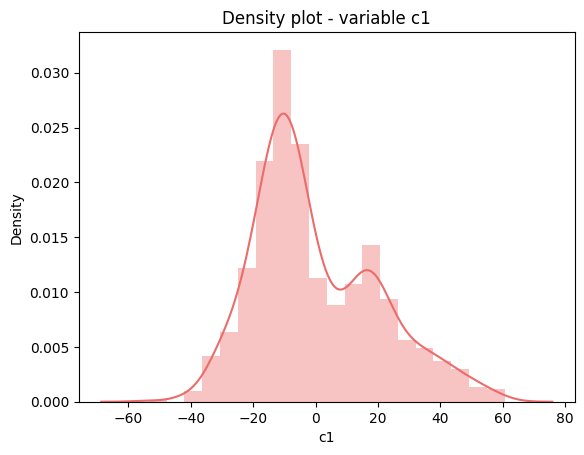

C:\Users\aleks\AppData\Local\Temp\ipykernel_24148\540614336.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.c2, color = '#eb6c6a').set(title = 'Density plot - variable c2')


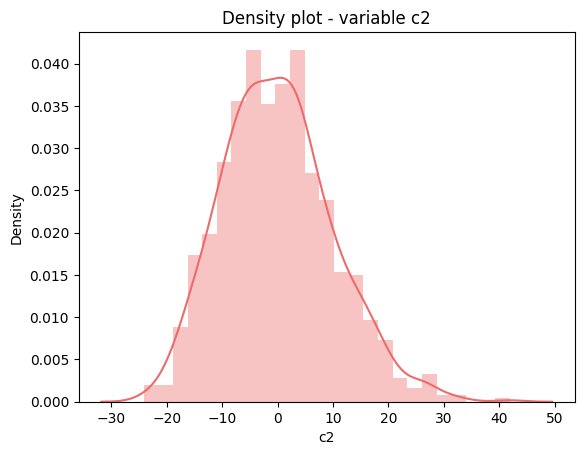

C:\Users\aleks\AppData\Local\Temp\ipykernel_24148\540614336.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.c3, color = '#eb6c6a').set(title = 'Density plot - variable c3')


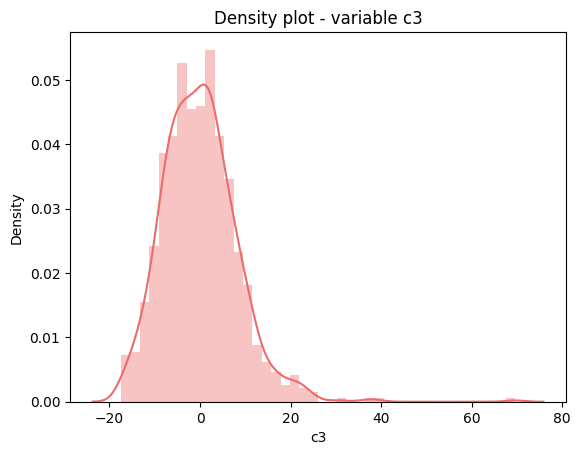

In [54]:
sns.distplot(df.c1, color = '#eb6c6a').set(title = 'Density plot - variable c1')
plt.show()
sns.distplot(df.c2, color = '#eb6c6a').set(title = 'Density plot - variable c2')
plt.show()
sns.distplot(df.c3, color = '#eb6c6a').set(title = 'Density plot - variable c3')
plt.show()

In [55]:
for col in df:
    if df[col].min() <= 0:
        df[col] = df[col] + np.abs(df[col].min()) + 1

In [56]:
df = np.log(df)

In [57]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

low_boundary = (q1 - 1.5 * iqr)
upp_boundary = (q3 + 1.5 * iqr)
num_of_outliers_L = (df[iqr.index] < low_boundary).sum()
num_of_outliers_U = (df[iqr.index] > upp_boundary).sum()
outliers = pd.DataFrame({'lower_boundary':low_boundary, 'upper_boundary':upp_boundary,'num_of_outliers__lower_boundary':num_of_outliers_L, 'num_of_outliers__upper_boundary':num_of_outliers_U})

In [58]:
outliers

,lower_boundary,upper_boundary,num_of_outliers__lower_boundary,num_of_outliers__upper_boundary
c1,2.894973,5.042191,6,0
c2,2.091366,4.245154,28,0
c3,1.662756,4.020724,32,2


In [59]:
df.head()

,c1,c2,c3
0,3.920086,2.195104,0.171035
1,3.612307,2.721227,3.242184
2,3.631281,3.542283,2.720315
3,3.925374,2.139948,2.216461
4,4.467592,3.320363,3.120010


In [60]:
df.shape

(935, 3)

In [61]:
df_ref = df.copy()

In [62]:
df_ref.shape

(935, 3)

In [63]:
for row in outliers.iterrows():
    print(row[1]['lower_boundary'])

2.8949730540018628
2.0913656537281855
1.6627560691663903


In [64]:
## Records that do not meet three ifs are deleted.
for row in outliers.iterrows():
    df = df[(df[row[0]] >= row[1]['lower_boundary']) 
            & (df[row[0]] <= row[1]['upper_boundary'])]

In [65]:
df.shape

(869, 3)

In [66]:
df = df.reset_index()

In [67]:
df = df.drop(columns=['index'])

In [68]:
df_ref['new_number'] = 'tst'

In [69]:
## decode_structures_from_clusters

for i in range(len(df_ref)):
    for m in range(len(df)):
        
        if df_ref['c1'][i] == df['c1'][m] and df_ref['c2'][i] == df['c2'][m] and df_ref['c3'][i] == df['c3'][m]:
            df_ref['new_number'][i] = m
        else:
            pass
        

C:\Users\aleks\AppData\Local\Temp\ipykernel_24148\1910909210.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref['new_number'][i] = m


In [70]:
df_ref.head() # tst means that this structure has been removed...

,c1,c2,c3,new_number
0,3.920086,2.195104,0.171035,tst
1,3.612307,2.721227,3.242184,0
2,3.631281,3.542283,2.720315,1
3,3.925374,2.139948,2.216461,2
4,4.467592,3.320363,3.120010,3


In [71]:
df_ref.to_excel('../Data/clustering_numbers_.xlsx')

In [72]:
scaler = StandardScaler()
scaler.fit(df)
df_std = scaler.transform(df)
df = pd.DataFrame(data=df_std, index=df.index, columns=df.columns)

C:\Users\aleks\AppData\Local\Temp\ipykernel_24148\540614336.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.c1, color = '#eb6c6a').set(title = 'Density plot - variable c1')


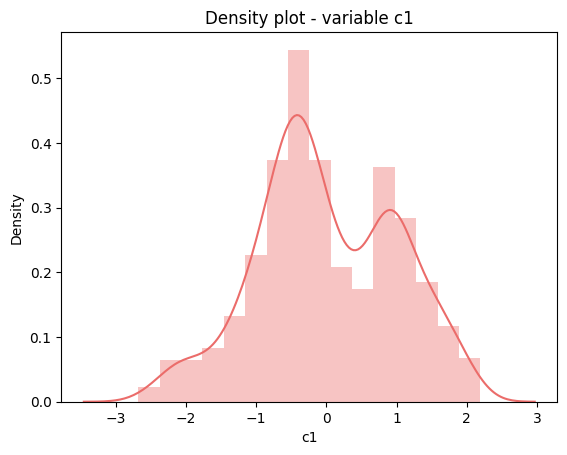

C:\Users\aleks\AppData\Local\Temp\ipykernel_24148\540614336.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.c2, color = '#eb6c6a').set(title = 'Density plot - variable c2')


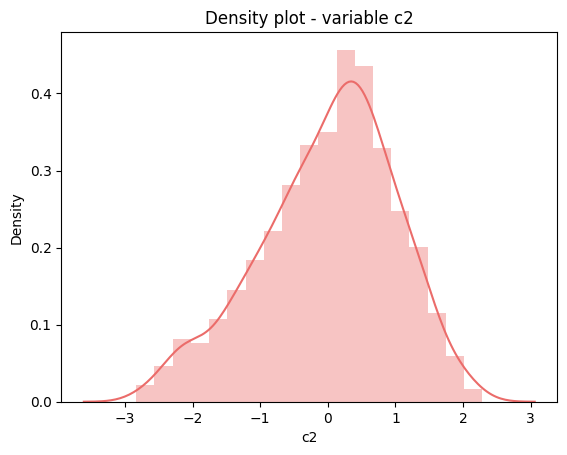

C:\Users\aleks\AppData\Local\Temp\ipykernel_24148\540614336.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.c3, color = '#eb6c6a').set(title = 'Density plot - variable c3')


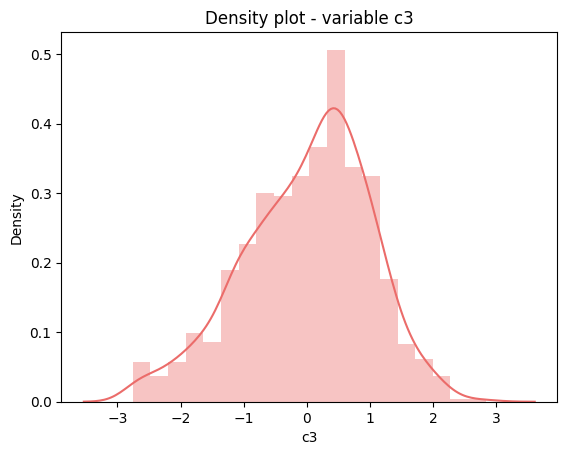

In [73]:
sns.distplot(df.c1, color = '#eb6c6a').set(title = 'Density plot - variable c1')
plt.show()
sns.distplot(df.c2, color = '#eb6c6a').set(title = 'Density plot - variable c2')
plt.show()
sns.distplot(df.c3, color = '#eb6c6a').set(title = 'Density plot - variable c3')
plt.show()

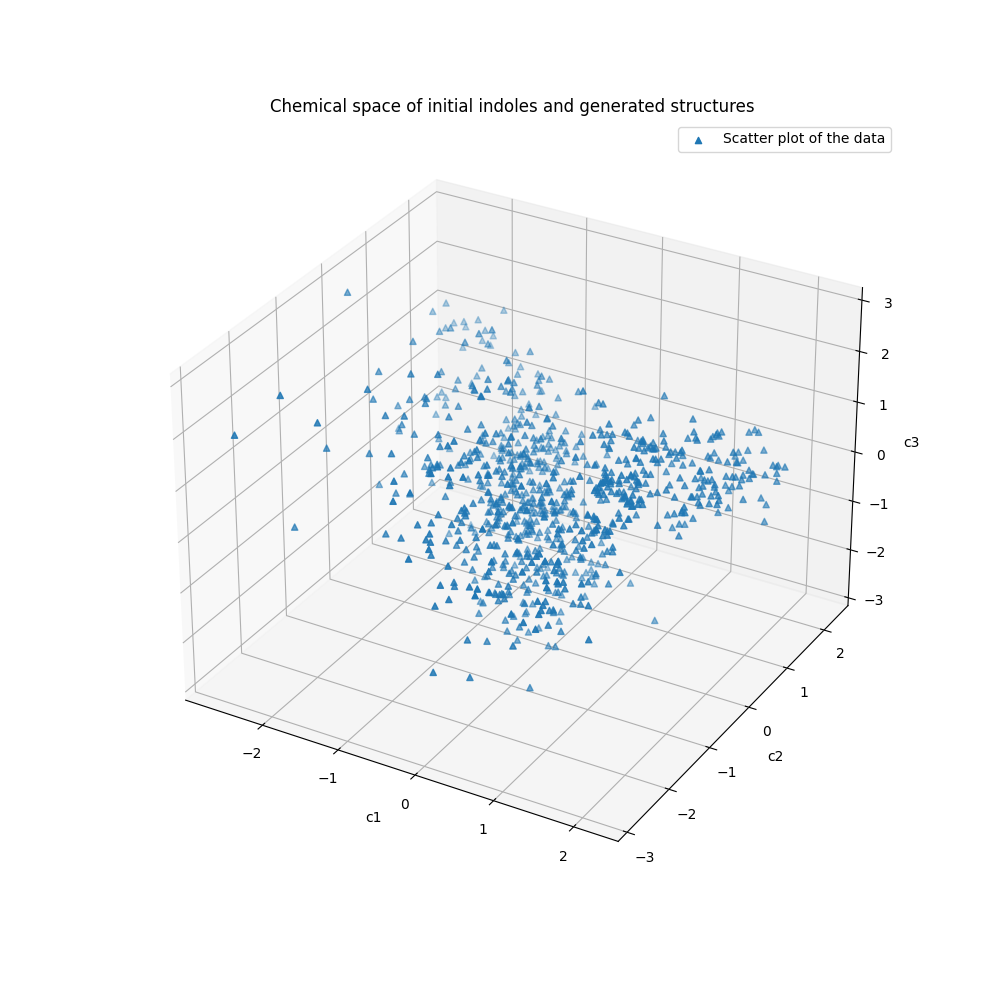

In [74]:
%matplotlib widget
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(df.c1, df.c2, df.c3, marker='^')
ax.legend(['Scatter plot of the data'])
ax.set_title('Chemical space of initial caffeines and generated structures')
ax.set_xlabel('c1')
ax.set_ylabel('c2')
ax.set_zlabel('c3')
#plt.show()
plt.ion()

In [75]:
model_1 = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=10).fit(df)

C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [76]:
df['label_1'] = model_1.labels_

In [77]:
df.head()

,c1,c2,c3,label_1
0,-0.889281,-1.208452,0.958672,3
1,-0.837617,0.919155,-0.309448,9
2,-0.036849,-2.714722,-1.533792,2
3,1.439522,0.344092,0.661795,7
4,1.163086,-0.747222,0.434310,0


In [78]:
bins = [i for i in range(10)]

In [79]:
bins

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [80]:
dfv = pd.DataFrame(data=bins, columns=['BINS'])

In [81]:
df.iloc[2]['label_1']

2.0

In [82]:
list_of_names = []
for i in range(len(bins)):
    list_of_names.append('df_'+str(i))

In [83]:
for i in range(len(bins)):
    list_of_names[i] = pd.DataFrame()

In [84]:
pd.DataFrame(df.iloc[2:5])

,c1,c2,c3,label_1
2,-0.036849,-2.714722,-1.533792,2
3,1.439522,0.344092,0.661795,7
4,1.163086,-0.747222,0.434310,0


In [85]:
label_0 = df.loc[df['label_1'] == 1]

In [86]:
label_0.head()

,c1,c2,c3,label_1
217,-0.881562,0.369497,1.455390,1
303,-0.454547,0.495979,1.151205,1
676,-1.822651,0.553358,-0.115135,1
697,-0.348870,0.501670,0.959300,1
701,-0.820299,0.562944,1.423512,1


In [87]:
for i in range(len(list_of_names)):
    list_of_names[i] = df.loc[df['label_1'] == i]

In [88]:
for i in range(len(bins)):
    print('Label '+ str(i) + ' ', str(list_of_names[i].shape))

Label 0  (103, 4)
Label 1  (84, 4)
Label 2  (86, 4)
Label 3  (108, 4)
Label 4  (115, 4)
Label 5  (115, 4)
Label 6  (43, 4)
Label 7  (101, 4)
Label 8  (47, 4)
Label 9  (67, 4)


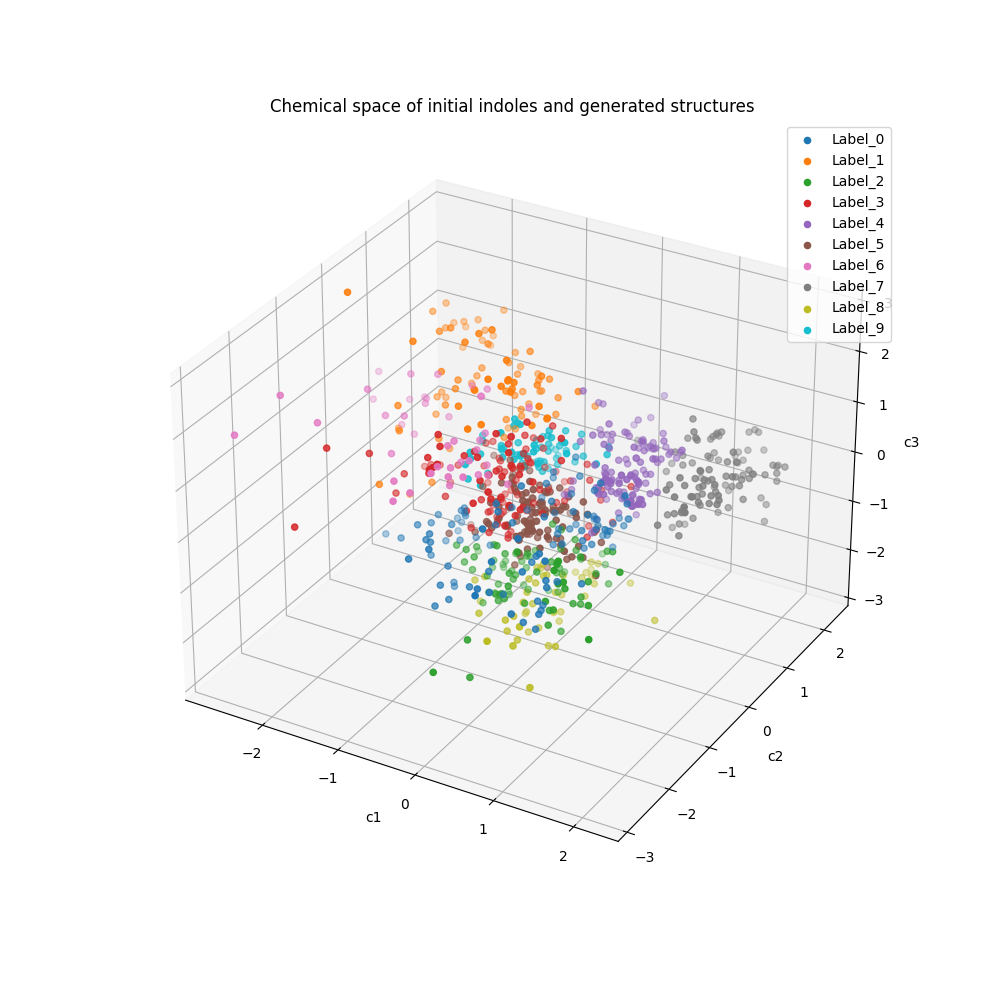

In [89]:
%matplotlib widget
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

for element in list_of_names:
    ax.scatter(element.c1, element.c2, element.c3)
#ax.scatter(df.c1, df.c2, df.c3, marker='^')
legend = []
for i in range(len(list_of_names)):
    legend.append('Label_'+ str(i))
    
ax.legend(legend)
ax.set_title('Chemical space of initial caffeines and generated structures')
ax.set_xlabel('c1')
ax.set_ylabel('c2')
ax.set_zlabel('c3')
#plt.show()
plt.ion()